In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
import numpy as np
import sys, os
from scipy.interpolate import interp1d
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np


In [3]:

def get_diff(mass,channel,nu):
    if channel=='tautau':
        ch = 11
    elif channel=='WW':
        ch = 8 
    elif channel=='bb':
        ch =5
    else:
        sys.exit("Nope, not a valid channel use eithe tautau, WW or bb")
    if nu=='nue':
        mynu=12
    elif nu=='anue':
        mynu=13
    elif nu=='numu':
        mynu=14
    elif nu=='anumu':
        mynu=15
    elif nu=='nutau':
        mynu=16
    elif nu=='anutau':
        mynu=17
    else:
        sys.exit("wrong nu flav, use: nue, anue, numu, anumu, nutau, anutau")
    datafile = open('../../dat-wa/wa-m'+str(mass)+'-ch'+str(ch)+'-sun-sum.dat')
    num = -1
    diff = np.array([])
    for l in datafile:
        if l[0]=='#':
            continue
        num += 1
        if num!=mynu:# or num>17:
            continue   
        row = l.split(' ')
        diff = np.append(diff,np.array(row[1:],dtype=float))
    return diff


    

<IPython.core.display.Javascript object>


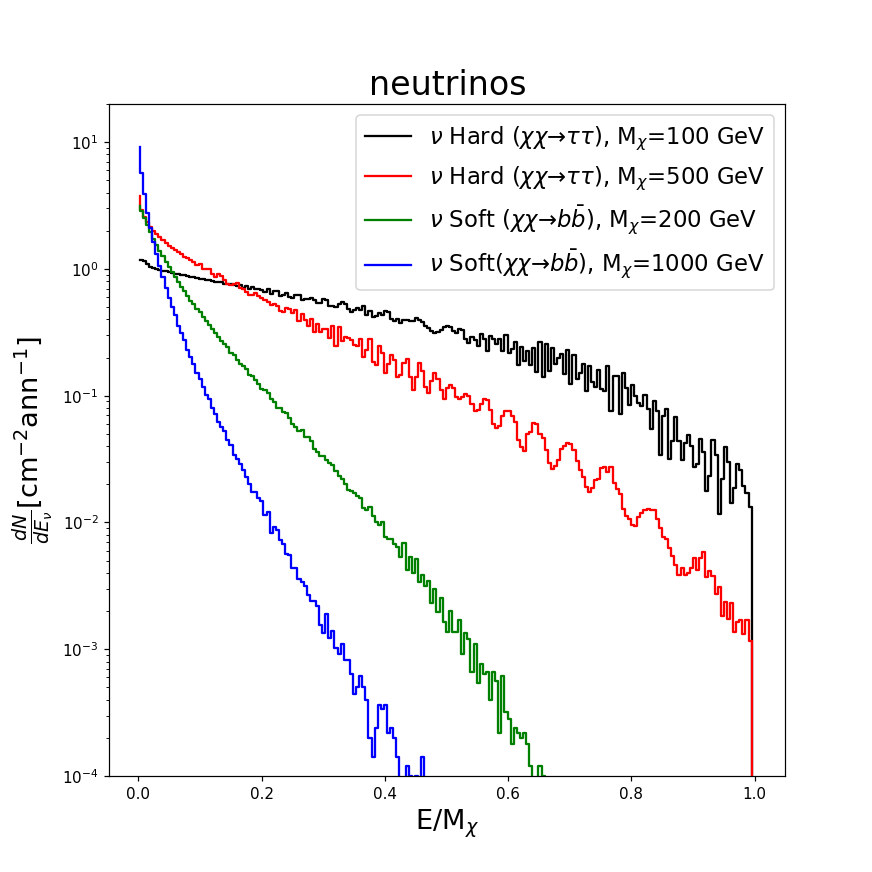

In [8]:
m100tau = get_diff(100,'tautau','numu')
m500tau = get_diff(500,'tautau','numu')
m200bbar = get_diff(200,'bb','numu')
m1000bbar = get_diff(1000,'bb','numu')


fig, ax = plt.subplots(figsize=[8,8])
ax.set_title("neutrinos",fontsize=22)
ax.set_xlabel(r'E/M$_{\chi}$',fontsize=18)
ax.set_ylabel(r'$\frac{dN}{dE_{\nu}}$[cm$^{-2}$ann$^{-1}$]',fontsize=18)
ax.set_yscale('log')


ax.set_ylim([1e-4,20])
x = np.linspace(0.0025,1.,200)
ax.step(x,m100tau,color='k',lw=1.5,label=r"$\nu$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=100 GeV")
ax.step(x,m500tau,color='r',lw=1.5,label=r"$\nu$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=500 GeV")
ax.step(x,m200bbar,color='g',lw=1.5,label=r"$\nu$ Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=200 GeV")
ax.step(x,m1000bbar,color='b',lw=1.5,label=r"$\nu$ Soft$(\chi \chi \to b \bar{b})$, M$_{\chi}$=1000 GeV")
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

In [5]:

m100tau = get_diff(100,'tautau','anumu')
m500tau = get_diff(500,'tautau','anumu')
m200bbar = get_diff(200,'bb','anumu')
m1000bbar = get_diff(1000,'bb','anumu')
fig, ax = plt.subplots(figsize=[8,8])
ax.set_title("antineutrinos",fontsize=22)
ax.set_xlabel(r'E/M$_{\chi}$',fontsize=18)
ax.set_ylabel(r'$\frac{dN}{dE_{\nu}}$[cm$^{-2}$ann$^{-1}$]',fontsize=18)
ax.set_yscale('log')
ax.set_ylim([1e-4,20])
x = np.linspace(0.0025,1.,200)
ax.step(x,m100tau,color='k',lw=1.5,label=r"$\bar{\nu}$,Hard $(\chi \chi \to \tau \tau)$ , M$_{\chi}$=100 GeV")
ax.step(x,m500tau,color='r',lw=1.5,label=r"$\bar{\nu}$,Hard $(\chi \chi \to \tau \tau)$ , M$_{\chi}$=500 GeV")
ax.step(x,m200bbar,color='g',lw=1.5,label=r"$\bar{\nu}$,Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=200 GeV")
ax.step(x,m1000bbar,color='b',lw=1.5,label=r"$\bar{\nu}$,Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=1000 GeV")
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)

<IPython.core.display.Javascript object>

In [5]:
mot = "mot"
print mot[1:]

ot


<IPython.core.display.Javascript object>


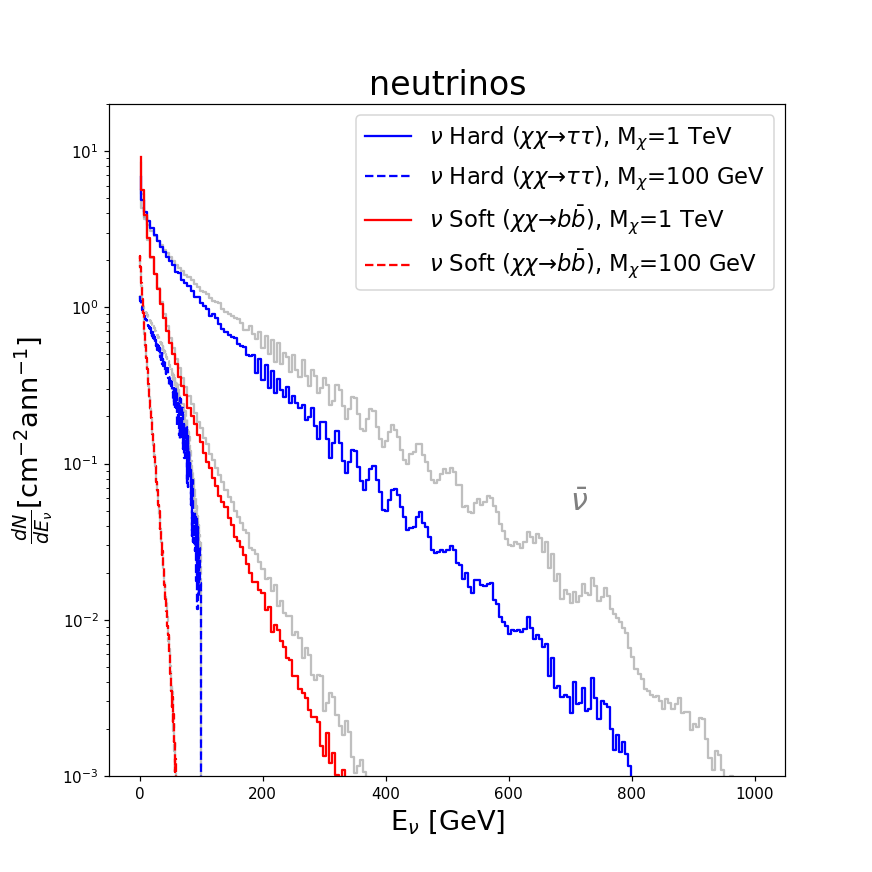

Text(700,0.05,'$\\bar{\\nu}$')

In [10]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_title("neutrinos",fontsize=22)
ax.set_xlabel(r'E$_{\nu}$ [GeV]',fontsize=18)
ax.set_ylabel(r'$\frac{dN}{dE_{\nu}}$[cm$^{-2}$ann$^{-1}$]',fontsize=18)
ax.set_yscale('log')
ax.set_ylim([1e-3,20])


##############
x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'tautau','anumu')
ax.step(x,m_i_tau,color="gray",lw=1.5,alpha=0.5)
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'tautau','anumu')
ax.step(x,m_i_tau,"gray",linestyle="--",lw=1.5,alpha=0.5)

x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'bb','anumu')
ax.step(x,m_i_tau,color="gray",lw=1.5,alpha=0.5)
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'bb','anumu')
ax.step(x,m_i_tau,color="gray",linestyle="--",lw=1.5,alpha=0.5)
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
aux=100000
############
x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'tautau','numu')
ax.step(x,m_i_tau,color="b",lw=1.5,label=r"$\nu$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=1 TeV")
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'tautau','numu')
ax.step(x,m_i_tau,"b",linestyle="--",lw=1.5,label=r"$\nu$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=100 GeV")

x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'bb','numu')
ax.step(x,m_i_tau,color="r",lw=1.5,label=r"$\nu$ Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=1 TeV")
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'bb','numu')
ax.step(x,m_i_tau,color="r",linestyle="--",lw=1.5,label=r"$\nu$ Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=100 GeV")
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
###############3

ax.text(700,0.05,r"$\bar{\nu}$", fontsize=20, color='gray')

<IPython.core.display.Javascript object>


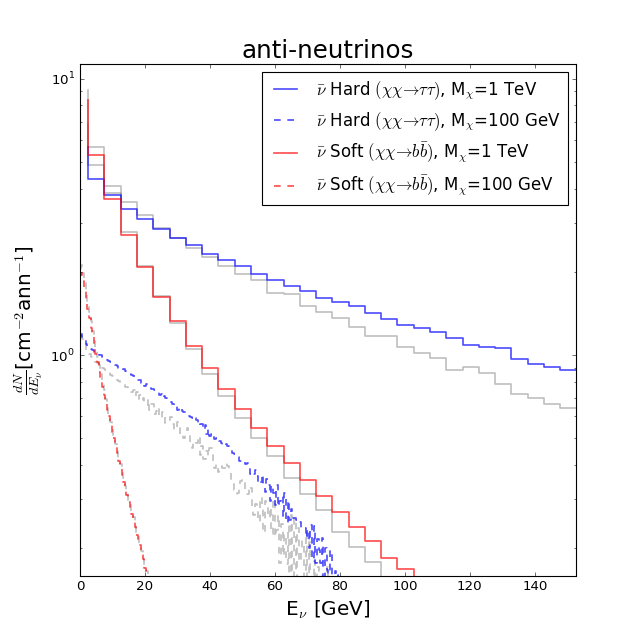

In [13]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_title("anti-neutrinos",fontsize=22)
ax.set_xlabel(r'E$_{\nu}$ [GeV]',fontsize=18)
ax.set_ylabel(r'$\frac{dN}{dE_{\nu}}$[cm$^{-2}$ann$^{-1}$]',fontsize=18)
ax.set_yscale('log')
ax.set_ylim([1e-4,20])
############
x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'tautau','numu')
ax.step(x,m_i_tau,color="gray",alpha=0.5,lw=1.5)
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'tautau','numu')
ax.step(x,m_i_tau,"gray",linestyle="--",alpha=0.5,lw=1.5)

x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'bb','numu')
ax.step(x,m_i_tau,color="gray",alpha=0.5,lw=1.5)
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'bb','numu')
ax.step(x,m_i_tau,color="gray",linestyle="--",alpha=0.5,lw=1.5)
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
###############3

x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'tautau','anumu')
ax.step(x,m_i_tau,color="b",alpha=float(aux)/len(arr),lw=1.5,label=r"$\bar{\nu}$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=1 TeV")
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'tautau','anumu')
ax.step(x,m_i_tau,"b",linestyle="--",alpha=float(aux)/len(arr),lw=1.5,label=r"$\bar{\nu}$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=100 GeV")

x = np.linspace(0.0025,1.,200)*1000
m_i_tau = get_diff(1000,'bb','anumu')
ax.step(x,m_i_tau,color="r",alpha=float(aux)/len(arr),lw=1.5,label=r"$\bar{\nu}$ Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=1 TeV")
x = np.linspace(0.0025,1.,200)*100
m_i_tau = get_diff(100,'bb','anumu')
ax.step(x,m_i_tau,color="r",linestyle="--",alpha=float(aux)/len(arr),lw=1.5,label=r"$\bar{\nu}$ Soft $(\chi \chi \to b \bar{b})$, M$_{\chi}$=100 GeV")
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax.text(700,0.001,r"$\nu$", fontsize=20, color='gray')

In [23]:
x_binned = np.array([50,80.3,100,150,176,200,250,350,500,750,1000,1500,2000,3000,5000,10000])
flu_bi_bb = np.array([1.1e16,6.6e14,2.4e14,6.1e13,3.8e13,2.7e13,1.5e13,7.1e12,4.4e12,2.6e12,1e12,7.7e11,6.9e11,6.2e11,5.5e11,5.6e11])
flu_bi_tt = np.array([6.2e13,8.8e12,4.1e12,1.5e12,9.9e11,7.4e11,2.6e11,1.5e11,9.9e10,3.4e10,2.9e10,2.9e10,2.9e10,3.2e10,3.5e10,5.4e10])

In [24]:
x_unbinned = np.array([50,100,150,176,200,250,350,500,750,1000,1500,2000,3000,5000])
sig_sd_tt = np.array([1.1e-3,2.48e-4,1.39e-4,1.15e-4,1.1e-4,8.82e-5,7.95e-5,8.48e-5,1.07e-4,1.37e-4,2.24e-4,3.2e-4,5.57e-4,1.13e-3])
sig_sd_bb = np.array([0.129,4.04e-2,2.36e-2,1.81e-2,1.51e-2,1.15e-2,1.03e-2,9.36e-3,9.68e-3,1.04e-2,1.37e-2,1.82e-2,2.6e-2,4.71e-2])
flu_unbi_bb = np.array([1.86e15,1.73e14,4.78e13,2.7e13,1.76e13,8.75e12,4.11e12,2.37e12,1.08e12,6.52e11,3.79e11,2.88e11,1.82e11,1.2e11])
flu_unbi_tt = np.array([4.8e13,3.02e12,7.69e11,4.67e11,3.19e11,1.75e11,8.03e10,4.2e10,2.36e10,1.72e10,1.26e10,1.03e10,8.01e9,5.02e9])

In [25]:
len(sig_sd_bb)

14

In [26]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma^p_{SD}$ [pb]",fontsize=25)
ax.set_xlabel(r"M$_{\chi}$ [GeV] ",fontsize=25)

ax.set_xlim([10,5e3])
ax.set_ylim([1e-5,1])

#ax.plot(np.array([1e5,1e6]),np.array([1e15,1e16]),"k--",lw=2, label="binned analysis 2007-2008")
#ax.plot(np.array([1e5,1e6]),np.array([1e15,1e16]),"k-",lw=2, label="unbinned analysis 2007-2012")



ax.plot(x_unbinned,sig_sd_bb,"r-",lw=2,label="unbinned limits")
ax.plot(x_unbinned,sig_sd_tt,"b-",lw=2,label="unbinned limits")
ax.text(12,1e-1,r"$m_{\chi} \,m_{\chi} \to b \,\bar{b}$",fontsize=18)
ax.text(12,1e-3,r"$m_{\chi} \,m_{\chi} \to \tau \,\bar{\tau}$",fontsize=18)

fig.tight_layout()
#legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)


<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\Phi_{\nu_{\mu}+\bar{\nu}_{\mu}}$ [km$^2$ yr$^{-1}$]",fontsize=25)
ax.set_xlabel(r"M$_{\chi}$ [GeV] ",fontsize=25)

ax.set_xlim([10,1e4])
ax.set_ylim([1e9,1e17])

ax.plot(np.array([1e5,1e6]),np.array([1e15,1e16]),"k--",lw=2, label="binned analysis 2007-2008")
ax.plot(np.array([1e5,1e6]),np.array([1e15,1e16]),"k-",lw=2, label="unbinned analysis 2007-2012")


ax.plot(x_binned,flu_bi_bb,"r--",lw=2) 
ax.plot(x_binned,flu_bi_tt,"b--",lw=2)
ax.plot(x_unbinned,flu_unbi_bb,"r-",lw=2)
ax.plot(x_unbinned,flu_unbi_tt,"b-",lw=2)
ax.text(12,3e15,r"$m_{\chi} \,m_{\chi} \to b \,\bar{b}$",fontsize=18)
ax.text(12,6e13,r"$m_{\chi} \,m_{\chi} \to \tau \,\bar{\tau}$",fontsize=18)

fig.tight_layout()
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)


<IPython.core.display.Javascript object>

In [29]:
def az_ze_sun(file):
    suninMonth = open(file)
    az, ze  = np.array([]),np.array([])
    for ln in suninMonth:
        if ln[0]=='#':
            continue
        row = ln.split(', ')
        az = np.append(az,float(row[0]))
        ze = np.append(ze,float(row[1][:-1]))
    return az, ze
    

In [30]:
%%latex

here $\theta = 0°$ is the nadir, $\theta = 90°$ is the horizon and $\theta = 180°$ the zenith??

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


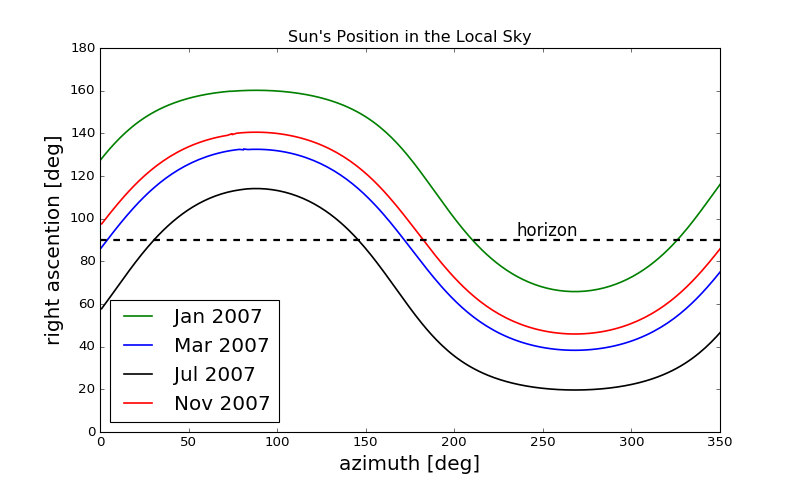

In [31]:
az_01,ze_01 = az_ze_sun('Months/enero07.dat')
az_04,ze_04 = az_ze_sun('Months/abril07.dat')
az_07,ze_07 = az_ze_sun('Months/julio07.dat')
az_10,ze_10 = az_ze_sun('Months/noviembre07.dat')


fig, ax = plt.subplots(figsize=[10,6])
ax.set_title("Sun's Position in the Local Sky")
ax.set_xlabel(r"azimuth [deg]",fontsize=18)
ax.set_ylabel(r"right ascention [deg]",fontsize=18)
ax.set_xlim([0,350])
#ax.set_ylim([0,85])

ax.plot(az_01[np.argsort(az_01)],ze_01[np.argsort(az_01)],'g',lw=1.5,label='Jan 2007')

ax.plot(az_04[np.argsort(az_04)],ze_04[np.argsort(az_04)],'b',lw=1.5,label='Mar 2007')

ax.plot(az_07[np.argsort(az_07)],ze_07[np.argsort(az_07)],'k',lw=1.5,label='Jul 2007')

ax.plot(az_10[np.argsort(az_10)],ze_10[np.argsort(az_10)],'r',lw=1.5,label='Nov 2007')
ax.axhline(y=90,linestyle='--',lw=2,color='k')
#ax.plot(x,fbotom(x))
legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=18)
ax.text(235,92,"horizon",fontsize=15)

<IPython.core.display.Javascript object>


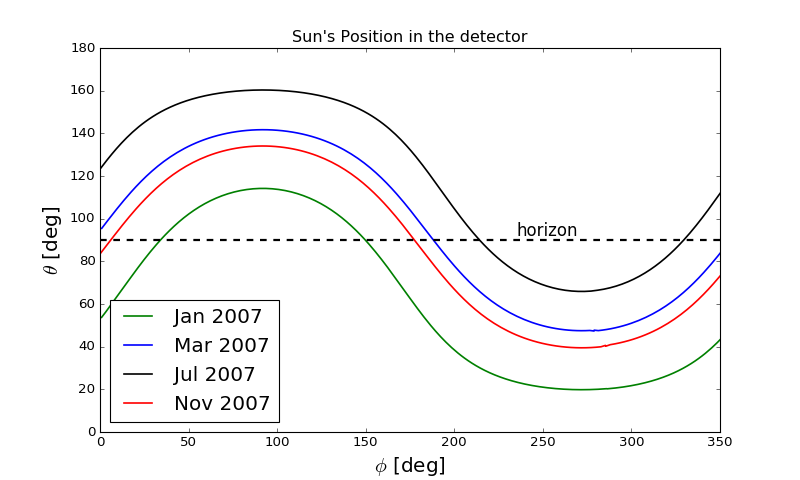

In [32]:
az_01,ze_01 = az_ze_sun('Months/enero07.dat')
az_04,ze_04 = az_ze_sun('Months/abril07.dat')
az_07,ze_07 = az_ze_sun('Months/julio07.dat')
az_10,ze_10 = az_ze_sun('Months/noviembre07.dat')


fig, ax = plt.subplots(figsize=[10,6])
ax.set_title("Sun's Position in the detector")
ax.set_xlabel(r"$\phi$ [deg]",fontsize=18)
ax.set_ylabel(r"$\theta$ [deg]",fontsize=18)
ax.set_xlim([0,350])
#ax.set_ylim([0,85])

ax.plot(az_01[np.argsort(az_01)]-2*(az_01[np.argsort(az_01)]-180),
        ze_01[np.argsort(az_01)]-2*(ze_01[np.argsort(az_01)]-90),'g',lw=1.5,label='Jan 2007')

ax.plot(az_04[np.argsort(az_04)]-2*(az_04[np.argsort(az_04)]-180),
        ze_04[np.argsort(az_04)]-2*(ze_04[np.argsort(az_04)]-90),'b',lw=1.5,label='Mar 2007')

ax.plot(az_07[np.argsort(az_07)]-2*(az_07[np.argsort(az_07)]-180),
        ze_07[np.argsort(az_07)]-2*(ze_07[np.argsort(az_07)]-90),'k',lw=1.5,label='Jul 2007')

ax.plot(az_10[np.argsort(az_10)]-2*(az_10[np.argsort(az_10)]-180),
ze_10[np.argsort(az_10)]-2*(ze_10[np.argsort(az_10)]-90),'r',lw=1.5,label='Nov 2007')
ax.axhline(y=90,linestyle='--',lw=2,color='k')
#ax.plot(x,ftop(x),c="gray",lw=5)
#ax.plot(x,fbotom(x),c="gray",lw=5)

legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=18)
ax.text(235,92,"horizon",fontsize=15)

In [33]:
a = az_01[np.argsort(az_01)]-2*(az_01[np.argsort(az_01)]-180)
b = ze_01[np.argsort(az_01)]-2*(ze_01[np.argsort(az_01)]-90)
x, y = a-360, b
x, y = np.append(x,a), np.append(y,b)
x, y = np.append(x,a+360), np.append(y,b)


ftop = interp1d(x,y)

a = az_07[np.argsort(az_07)]-2*(az_07[np.argsort(az_07)]-180)
b = ze_07[np.argsort(az_07)]-2*(ze_07[np.argsort(az_07)]-90)
x, y = a-360, b
x, y = np.append(x,a), np.append(y,b)
x, y = np.append(x,a+360), np.append(y,b)


fbotom = interp1d(x,y)

<IPython.core.display.Javascript object>


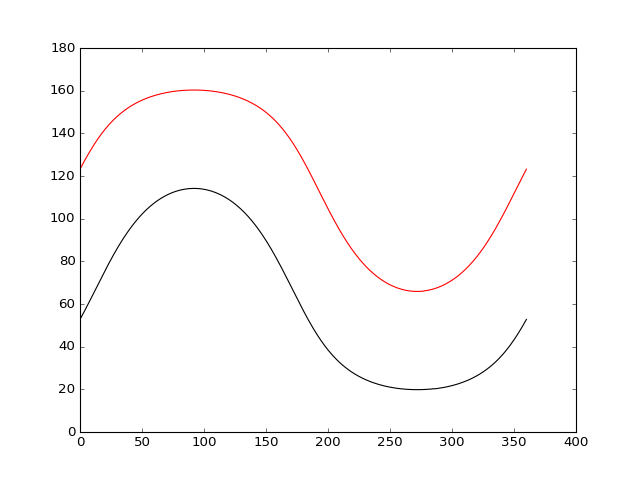

In [34]:
lines=360
x=np.linspace(0,lines,2*lines)

fig, ax = plt.subplots()
ax.plot(x,ftop(x),c="k")
ax.plot(x,fbotom(x),c="r")




In [35]:
"""
lines = 400
x=np.linspace(0,lines,2*lines)

outfile = open("../../datafiles/bandfile.txt","w")
for i in x:
    outfile.write("{0:.1f} {1:.2f} {2:.2f} \n".format(i, ftop(i), fbotom(i)))
    print "{0:.1f} {1:.2f} {2:.2f} ".format(i, ftop(i), fbotom(i))
"""

'\nlines = 400\nx=np.linspace(0,lines,2*lines)\n\noutfile = open("../../datafiles/bandfile.txt","w")\nfor i in x:\n    outfile.write("{0:.1f} {1:.2f} {2:.2f} \n".format(i, ftop(i), fbotom(i)))\n    print "{0:.1f} {1:.2f} {2:.2f} ".format(i, ftop(i), fbotom(i))\n'

In [51]:
pppc1T = np.loadtxt("../../datafiles/Arturo-nuSUN-1TeV.txt")
E1T = pppc1T[:,0]
bb1T = pppc1T[:,1]
WW1T = pppc1T[:,2]
tt1T = pppc1T[:,3]
nunu1T = pppc1T[:,4]
pppc100G = np.loadtxt("../../datafiles/Arturo-nuSUN-100GeV.txt")
E100 = pppc100G[:,0]
bb100 = pppc100G[:,1]
WW100 = pppc100G[:,2]
tt100 = pppc100G[:,3]
nunu100 = pppc100G[:,4]

<IPython.core.display.Javascript object>


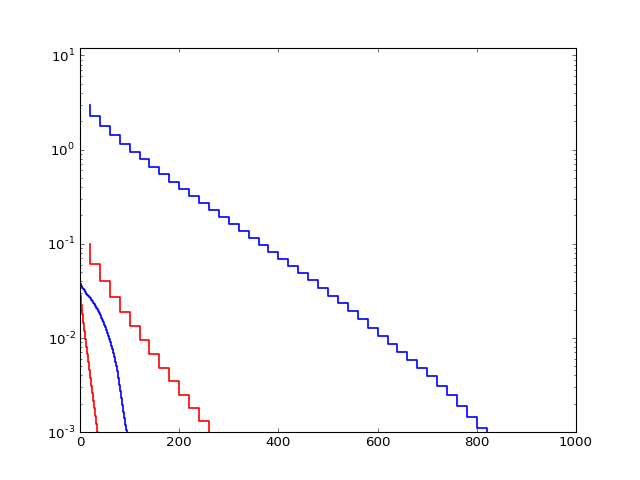

In [68]:
fig, ax =plt.subplots()
ax.set_yscale("log")
ax.set_ylim([1e-3,12])
ax.step(E1T,3*tt1T/tt1T.max(),color="b",lw=1.5,label=r"$\bar{\nu}$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=1 TeV")
ax.step(E1T,.1*bb1T/bb1T.max(),color="r",lw=1.5,label=r"$\bar{\nu}$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=1 TeV")
ax.step(E100,tt100,color="b",lw=1.5,label=r"$\bar{\nu}$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=1 TeV")
ax.step(E100,bb100,color="r",lw=1.5,label=r"$\bar{\nu}$ Hard $(\chi \chi \to \tau \tau)$, M$_{\chi}$=1 TeV")

